In [1]:
# Standard modules
import sys

# 3rd party modules
import xarray as xr
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cftime


# we add our 'cesm_tools' directory to pythons look-up path
# then we can import python files using the 'import command'
# sys.path.insert(0, "/home/slingbeek/scripts/cesm_tools/")
# import cesm_scenarios2 # 'cesm_scenarios' contains the 'Scenario' class

# to suppress annoying warnings
import warnings
warnings.filterwarnings('ignore')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0rc2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.11/site-packages/traitlets/config/application.py", line 1051, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/site-packages/torn

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0rc2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.11/site-packages/traitlets/config/application.py", line 1051, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/site-packages/torn

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0rc2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.11/site-packages/traitlets/config/application.py", line 1051, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/site-packages/torn

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0rc2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.11/site-packages/traitlets/config/application.py", line 1051, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/site-packages/torn

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [2]:
save = False
imgsize1 = (8,2.5)
imgsize3 = (8,5)
imgsize2 = (4,6)
imgres = 200

plt.rcParams.update({'font.size': 7})

slice_i = slice('2016','2035')
slice_f = slice('2080','2099')

# Load CAM data

In [3]:
# # Meta data
# cases_cnt = {'b.e21.BSSP585cmip6.f09_g17.control.01': {'directory': '/home/slingbeek/cesm2_data/monthly','years': np.arange(2015,2100)}}
# cases_sai20 = {'b.e21.BSSP585cmip6.f09_g17.2020feedback.01': {'directory': '/home/slingbeek/cesm2_data/monthly','years': np.arange(2020,2045)},
#                'b.e21.BSSP585cmip6.f09_g17.2020feedback.02': {'directory': '/home/slingbeek/cesm2_data/monthly','years': np.arange(2045,2100)}}
# 
# cases = [cases_cnt, cases_sai20]
# scenario_names = ['Control', 'SAI 2020'] 
# 
# # Define dictionary
# scenarios = {name: cesm_scenarios2.Scenario(name,case) for name, case in zip(scenario_names,cases)}


In [3]:
def CAMSAI_get_var(var):
    pt1 = xr.open_dataset('/Users/Simone/Documents/Uni/Master/Y2/Thesis/data/b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.'+var+'.208001-209412.nc')
    pt2 = xr.open_dataset('/Users/Simone/Documents/Uni/Master/Y2/Thesis/data/b.e21.BSSP585cmip6.f09_g17.2020feedback.02.cam.h0.'+var+'.209501-209912.nc')
    return xr.concat((pt1,pt2),dim='time')

In [4]:
def CAMcnt_get_var(var):
    return xr.open_dataset('/Users/Simone/Documents/Uni/Master/Y2/Thesis/data/b.e21.BSSP585cmip6.f09_g17.control.01.cam.h0.'+var+'.201601-203512.nc')

+# Load WACCM data

In [4]:
def CMIP6_get_var(var):
    return xr.open_dataset('/home/slingbeek/CMIP6/'+var+'/'+var+'.Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc')

In [5]:
def GLENS2_get_var(var):
    pt1 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.'+var+'.207001-207912.nc')
    pt2 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.'+var+'.208001-208912.nc')
    pt3 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.'+var+'.209001-210012.nc')

    time1 = ('time', pt1.time_bnds.mean('nbnd').data, pt1.time.attrs)
    time2 = ('time', pt2.time_bnds.mean('nbnd').data, pt2.time.attrs)
    time3 = ('time', pt3.time_bnds.mean('nbnd').data, pt3.time.attrs)

    pt1 = pt1.assign_coords({'time1':time1}).swap_dims({'time':'time1'}).drop_vars('time').rename({'time1':'time'})
    pt2 = pt2.assign_coords({'time2':time2}).swap_dims({'time':'time2'}).drop_vars('time').rename({'time2':'time'})
    pt3 = pt3.assign_coords({'time3':time3}).swap_dims({'time':'time3'}).drop_vars('time').rename({'time3':'time'})
    return xr.concat((pt1,pt2,pt3),dim='time')
    

# Test

In [7]:
ds1 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.207001-207912.nc')
ds2 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.208001-208912.nc')
ds3 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.209001-210012.nc')

ds4 = xr.open_dataset('/home/slingbeek/CMIP6/tas/tas.Amon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc')


In [8]:
time1 = ('time', ds1.time_bnds.mean('nbnd').data, ds1.time.attrs)
time2 = ('time', ds2.time_bnds.mean('nbnd').data, ds2.time.attrs)
time3 = ('time', ds3.time_bnds.mean('nbnd').data, ds3.time.attrs)
time4 = ('time', ds4.time_bnds.mean('nbnd').data, ds4.time.attrs)

ds1 = ds1.assign_coords({'time1':time1}).swap_dims({'time':'time1'}).drop_vars('time').rename({'time1':'time'})
ds2 = ds2.assign_coords({'time2':time2}).swap_dims({'time':'time2'}).drop_vars('time').rename({'time2':'time'})
ds3 = ds3.assign_coords({'time3':time3}).swap_dims({'time':'time3'}).drop_vars('time').rename({'time3':'time'})
ds4 = ds4.assign_coords({'time4':time4}).swap_dims({'time':'time4'}).drop_vars('time').rename({'time4':'time'})

In [9]:
trefhtWJJA_i_c = time_mean3(ds4.sel(time=ds4.time.dt.season=='JJA'),slice('2016','2025'),'tas')
# trefhtWJJA_f_c = time_mean2(trefhtW_c.sel(time=trefhtW_c.time.dt.month.isin([6,7,8])),slice_f,'tas')
trefhtWJJA_f_20 = time_mean3(ds1.sel(time=ds1.time.dt.season=='JJA'),slice('2070','2079'),'TREFHT')


NameError: name 'time_mean3' is not defined

In [13]:
fig = plt.figure(figsize=(4,3), layout='tight', dpi=imgres)

ax1 = fig.add_subplot(1,1,1,projection=ccrs.Robinson(central_longitude=14))

ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.add_feature(cfeature.LAND)

(trefhtWJJA_f_20-trefhtWJJA_i_c).plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})


TypeError: Figure.__init__() got an unexpected keyword argument 'layout'

# Handy functions

In [5]:
def surf_mean(field):
    weights = np.cos(np.deg2rad(field.lat))
    weighted = field.weighted(weights)
    return weighted.mean(('lon','lat'))

In [6]:
def time_mean(field,time_slice):
    ds = field.sel(time=time_slice)
    ds['tw'] = (ds.time_bnds[:,1].astype("datetime64[ns]") - ds.time_bnds[:,0].astype("datetime64[ns]")).dt.days
    return ds.weighted(ds.tw).mean('time', keep_attrs=True).drop('tw')

In [7]:
# def time_mean2(field,time_slice,var):
#     ds = field.sel(time=time_slice)
#     weights = (np.roll(ds.time_bnds[:,0].astype("datetime64[ns]"), shift=-1) - ds.time_bnds[:,0].astype("datetime64[ns]")).dt.days
#     weights[-1] = weights[11]
#     return ds[var].weighted(weights).mean('time', keep_attrs=True)

In [8]:
def time_mean3(field,time_slice,var):
    ds = field.sel(time=time_slice)
    weights = (ds.time_bnds[:,1].astype("datetime64[ns]") - ds.time_bnds[:,0].astype("datetime64[ns]")).dt.days
    return ds[var].weighted(weights).mean('time', keep_attrs=True)

In [9]:
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time")

In [10]:
def T0_func(ds):
    psi = np.deg2rad(ds.lat)
    A = integrate.simpson(y=np.cos(psi), x=psi)
    L0 = ds.mean(dim='lon')*np.cos(psi)
    T0 = (1/A) * integrate.simpson(y=L0, x=psi)
    return T0

In [11]:
def T1_func(ds):
    psi = np.deg2rad(ds.lat)
    A = integrate.simpson(y=np.cos(psi), x=psi)
    L1 = ds.mean(dim='lon')*np.sin(psi)*np.cos(psi)
    T1 = (1/A) * integrate.simpson(y=L1, x=psi)
    return T1

In [12]:
def T2_func(ds):
    psi = np.deg2rad(ds.lat)
    A = integrate.simpson(y=np.cos(psi), x=psi)
    L2 = ds.mean(dim='lon')*(1/2)*(3*np.sin(psi)**2-1)*np.cos(psi)
    T2 = (1/A) * integrate.simpson(y=L2, x=psi)
    return T2

In [13]:
p_ref = 100000
cp = 1004
Rdry = 286.9
kappa = Rdry/cp

def theta(ds):
    return ds.T*(p_ref/ds.plev)**kappa

def theta2(ds, var):
    return ds[var]*(p_ref/ds.plev)**kappa


# Temperature gradients

## Data

In [16]:
scenarios['Control'].get_atm_var2('TREFHT')
scenarios['SAI 2020'].get_atm_var2('TREFHT')
trefht_C_c = scenarios['Control']['TREFHT']['TREFHT']
trefht_C_20 = scenarios['SAI 2020']['TREFHT']['TREFHT']

trefht_W_c = CMIP6_get_var('tas')['tas']
trefht_W_20_1 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/TREFHT/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.201901-206812.nc')
trefht_W_20_2 = xr.open_dataset('/home/slingbeek/GLENS2/monthly/TREFHT/b.e21.BWSSP585cmip6.f09_g17.CMIP6-SSP5-8.5-WACCM.feedback.15C.001.cam.h0.TREFHT.206901-210012.nc')
trefht_W_20 = xr.concat((trefht_W_20_1, trefht_W_20_2), dim='time')['TREFHT']

scen_t = ['C_c', 'C_20', 'W_c', 'W_20']
deltas = ['C_cref', 'C_20ref', 'W_cref', 'W_20ref']

tfull = {
    'C_c':trefht_C_c,
    'C_20':trefht_C_20,
    'W_c':trefht_W_c,
    'W_20':trefht_W_20
}


In [17]:
time_dict = {}
for i in range(len(deltas)):
    time_dict[deltas[i]] = tfull[scen_t[i]].groupby('time.year').mean(dim='time').year

In [18]:
### T0 - GMST compared to 2020
T0 = {}
for i in scen_t:
    T0[i] = T0_func(tfull[i].groupby('time.year').mean(dim='time'))

deltaT0 = {
    'C_cref':T0['C_c']- np.mean(T0['C_c'][0:10]),
    'C_20ref':T0['C_20'] - np.mean(T0['C_c'][0:10]),
    'W_cref':T0['W_c']- np.mean(T0['W_c'][0:10]),
    'W_20ref':T0['W_20'] - np.mean(T0['W_c'][0:10])
}
    

In [19]:
### T1 - Interhemispheric temperature
T1 = {}
for i in scen_t:
    T1[i] = T1_func(tfull[i].groupby('time.year').mean(dim='time'))

deltaT1 = {
    'C_cref':T1['C_c']- np.mean(T1['C_c'][0:10]),
    'C_20ref':T1['C_20'] - np.mean(T1['C_c'][0:10]),
    'W_cref':T1['W_c']- np.mean(T1['W_c'][0:10]),
    'W_20ref':T1['W_20'] - np.mean(T1['W_c'][0:10])
}

In [20]:
### T2 - equator-to-pole temperature 
T2 = {}
for i in scen_t:
    T2[i] = T2_func(tfull[i].groupby('time.year').mean(dim='time'))

deltaT2 = {
    'C_cref':T2['C_c']- np.mean(T2['C_c'][0:10]),
    'C_20ref':T2['C_20'] - np.mean(T2['C_c'][0:10]),
    'W_cref':T2['W_c']- np.mean(T2['W_c'][0:10]),
    'W_20ref':T2['W_20'] - np.mean(T2['W_c'][0:10])
}

## Plot

In [21]:
cols = ['firebrick', 'navy', 'orangered', 'dodgerblue']
labels = ['CAM-Control', 'CAM-SAI 2020', 'WACCM-Control', 'WACCM-SAI 2020']

fig, axs = plt.subplots(3,1, sharex=True, figsize=imgsize2, dpi=imgres, layout='constrained')

for i in range(len(deltas)):
    axs[0].plot(time_dict[deltas[i]], deltaT0[deltas[i]], label=labels[i], color=cols[i], linewidth=1.3)

axs[0].set_ylabel(r'$\Delta$T$_0$ [K]')
axs[0].legend(prop={'size': 6})
axs[0].grid()
axs[0].set_ylim(-0.5,5.5)
axs[0].set_xlim(2015,2100)


for i in range(len(deltas)):
    axs[1].plot(time_dict[deltas[i]], deltaT1[deltas[i]], color=cols[i], linewidth=1.3)

axs[1].set_ylabel(r'$\Delta$T$_1$ [K]')
axs[1].grid()
axs[1].set_ylim(-0.12,0.5)


for i in range(len(deltas)):
    axs[2].plot(time_dict[deltas[i]], deltaT2[deltas[i]], color=cols[i], linewidth=1.3)

axs[2].set_xlabel('Year')
axs[2].set_ylabel(r'$\Delta$T$_2$ [K]')
axs[2].grid()
axs[2].set_ylim(-0.1,0.5)

if save == True: plt.savefig('paper_imgs/Tgrad.png'); plt.close()

# Surface temperature

## Data

In [28]:
### CAM
scenarios['Control'].get_atm_var2('TREFHT')
scenarios['SAI 2020'].get_atm_var2('TREFHT')

scenarios['Control']['TREFHT']['TREFHT'] = scenarios['Control']['TREFHT']['TREFHT'] - 273.15
scenarios['SAI 2020']['TREFHT']['TREFHT'] = scenarios['SAI 2020']['TREFHT']['TREFHT'] - 273.15

In [29]:
### WACCM
trefhtW_ref = CMIP6_get_var('tas')
trefhtW_20 = GLENS2_get_var('TREFHT')

# trefhtW_ref = trefhtW_c.sel(time=slice('2016','2099'))

# time_donor = scenarios['Control']['TREFHT'].sel(time=slice('2016','2099'))
# trefhtW_ref = trefhtW_c.assign_coords({'time2':('time',time_donor.time.data, time_donor.time.attrs)}).swap_dims({'time':'time2'}).drop('time').rename({'time2':'time'})
 
trefhtW_ref['tas'] = trefhtW_ref['tas'] - 273.15
trefhtW_20['TREFHT'] = trefhtW_20['TREFHT'] - 273.15


In [30]:
# Surface temperature annual mean
trefht = {
    'C_ref':time_mean(scenarios['Control']['TREFHT'],slice_i)['TREFHT'],
    'C_20':time_mean(scenarios['SAI 2020']['TREFHT'],slice_f)['TREFHT'],

    'CJJA_ref':time_mean(scenarios['Control']['TREFHT'].sel(time=scenarios['Control']['TREFHT'].time.dt.season=='JJA'),slice_i)['TREFHT'],
    'CJJA_20':time_mean(scenarios['SAI 2020']['TREFHT'].sel(time=scenarios['SAI 2020']['TREFHT'].time.dt.season=='JJA'),slice_f)['TREFHT'],

    'CDJF_ref':time_mean(scenarios['Control']['TREFHT'].sel(time=scenarios['Control']['TREFHT'].time.dt.season=='DJF'),slice_i)['TREFHT'],
    'CDJF_20':time_mean(scenarios['SAI 2020']['TREFHT'].sel(time=scenarios['SAI 2020']['TREFHT'].time.dt.season=='DJF'),slice_f)['TREFHT'],

    'W_ref':time_mean3(trefhtW_ref,slice_i,'tas'),
    'W_20':time_mean3(trefhtW_20,slice_f,'TREFHT'),

    'WJJA_ref':time_mean3(trefhtW_ref.sel(time=trefhtW_ref.time.dt.season=='JJA'),slice_i,'tas'),
    'WJJA_20':time_mean3(trefhtW_20.sel(time=trefhtW_20.time.dt.season=='JJA'),slice_f,'TREFHT'),

    'WDJF_ref':time_mean3(trefhtW_ref.sel(time=trefhtW_ref.time.dt.season=='DJF'),slice_i,'tas'),
    'WDJF_20':time_mean3(trefhtW_20.sel(time=trefhtW_20.time.dt.season=='DJF'),slice_f,'TREFHT')

}


In [31]:
C_ref = ['C_ref', 'CJJA_ref', 'CDJF_ref']
W_ref = ['W_ref', 'WJJA_ref', 'WDJF_ref']
C_20 = ['C_20', 'CJJA_20', 'CDJF_20']
W_20 = ['W_20', 'WJJA_20', 'WDJF_20']

C_20ref = ['C_20ref', 'CJJA_20ref', 'CDJF_20ref']
W_20ref = ['W_20ref', 'WJJA_20ref', 'WDJF_20ref']
CW = ['CW', 'CWJJA', 'CWDJF']

trefht_d = {}

for i in range(3):
    trefht_d[C_ref[i]] = trefht[C_ref[i]].compute()
    trefht_d[W_ref[i]] = trefht[W_ref[i]].compute()    
    trefht_d[C_20ref[i]] = (trefht[C_20[i]] - trefht[C_ref[i]]).compute()
    trefht_d[W_20ref[i]] = (trefht[W_20[i]] - trefht[W_ref[i]]).compute()
    trefht_d[CW[i]] = (trefht_d[W_20ref[i]] - trefht_d[C_20ref[i]]).compute()
    

In [32]:
C_zma = ['C', 'CJJA', 'CDJF']
W_zma = ['W', 'WJJA', 'WDJF']

trefht_zma = {}

for i in range(len(C_20ref)):
    trefht_zma[C_zma[i]] = trefht_d[C_20ref[i]].mean(dim='lon').compute()
    trefht_zma[W_zma[i]] = trefht_d[W_20ref[i]].mean(dim='lon').compute()


## Plots

In [33]:
scens = np.stack((C_20ref, W_20ref, CW, C_ref, W_ref)).T
labels = ['(a) CAM', '(b) WACCM', '(c) WACCM – CAM']

fig, ax = plt.subplots(1,3, figsize=imgsize1, layout='constrained', dpi=imgres, subplot_kw={'projection':ccrs.Robinson(central_longitude=14)})

for i in range(2):
    ax[i].coastlines(resolution='110m', linewidth=0.5)

    im = trefht_d[scens[0][i]].plot(ax=ax[i], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, add_colorbar=False)
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

    plot = trefht_d[scens[0][i+3]].plot.contour(ax=ax[i], transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
    ax[i].clabel(plot, fontsize='small', inline_spacing=1)

    ax[i].set_title(labels[i], loc='left', fontsize='large')


ax[2].coastlines(resolution='110m', linewidth=0.5)

im3 = trefht_d[scens[0][2]].plot(ax=ax[2], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('PuOr_r', 11), vmin=-2, vmax=2, add_colorbar=False)
gl3 = ax[2].gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot3 = trefht_d[scens[0][-1]].plot.contour(ax=ax[2], transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
ax[2].clabel(plot3, fontsize='small', inline_spacing=1)

ax[2].set_title(labels[2], loc='left', fontsize='large')

if save == True: plt.savefig('paper_imgs/TREFHT_ann.png'); plt.close()

plt.colorbar(im, ax=ax[:2], shrink=0.4, location='bottom', label='°C', extend='min')
plt.colorbar(im3, ax=ax[-1], shrink=0.8, location='bottom', label='°C', extend='min')

if save == True: plt.savefig('paper_imgs/TREFHT_ann.png'); plt.close()


In [34]:
sn_scen = np.asarray([['CJJA', 'WJJA', 'W'],['CDJF', 'WDJF', 'W']])
labels = np.asarray([['(a) JJA CAM', '(b) JJA WACCM', '(c) Zonal mean \n JJA anomaly'],['(d) DJF CAM', '(e) DJF WACCM', '(f) Zonal mean \n DJF anomaly']])
colorlist = ['orangered', 'dodgerblue', 'k']


fig, ax = plt.subplots(2,3, width_ratios=[2,2,1], figsize=imgsize3, layout='constrained', dpi=imgres, subplot_kw={'projection':ccrs.Robinson(central_longitude=14)})
fig.suptitle('Seasonal temperature anomalies in CAM and WACCM')

ax[0,2].remove()
ax[0,2] = fig.add_subplot(2, 5, 5, projection=None, box_aspect=1.9)
ax[1,2].remove()
ax[1,2] = fig.add_subplot(2, 5, 10, projection=None, sharex=ax[0,2], box_aspect=1.9)

for j in (0,1):
    for i in (0,1):
        ax[j,i].coastlines(resolution='110m', linewidth=0.5)
    
        im = trefht_d[scens[j+1][i]].plot(ax=ax[j,i], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, add_colorbar=False)
        gl = ax[j,i].gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')
    
        plot = trefht_d[scens[j+1][i+3]].plot.contour(ax=ax[j,i], transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
        ax[j,i].clabel(plot, fontsize='small', inline_spacing=1)
    
        ax[j,i].set_title(labels[j,i], loc='left', fontsize='large')

    for i in range(3):
        
        im3 = trefht_zma[sn_scen[j,i]].plot(ax=ax[j,2], y='lat', color=colorlist[i])
    
    ax[j,2].set_ylim(-90,90)
    ax[j,2].set_xlabel('')
    ax[j,2].set_ylabel('Latitude [°N]')
    ax[j,2].yaxis.set_ticks_position("right")
    ax[j,2].yaxis.set_label_position("right")
    ax[j,2].grid()   
    ax[j,2].set_title(label=labels[j,2], loc='left', fontsize='large')

ax[1,2].set_xlabel('°C')

plt.colorbar(im, ax=ax[:,:2], shrink=0.4, location='bottom', label='°C', extend='both')

if save == True: plt.savefig('paper_imgs/TREFHT_seas.png'); plt.close()



In [35]:
# fig = plt.figure(figsize=imgsize3, layout='tight', dpi=imgres)

# ### CAM JJA
# ax1 = fig.add_subplot(2,5,(1,2),projection=ccrs.Robinson(central_longitude=14))

# ax1.coastlines(resolution='110m', linewidth=0.5)
# ax1.add_feature(cfeature.LAND)

# trefhtCJJA_20ref.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
# gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

# plot1 = trefhtCJJA_i_c.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
# ax1.clabel(plot1, fontsize='small', inline_spacing=1)

# ax1.set_title('(a) CAM JJA', loc='left', fontsize='large')

# ### WACCM JJA
# ax2 = fig.add_subplot(2,5,(3,4),projection=ccrs.Robinson(central_longitude=14))

# ax2.coastlines(resolution='110m', linewidth=0.5)
# ax2.add_feature(cfeature.LAND)

# trefhtWJJA_20ref.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
# gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

# plot2 = trefhtWJJA_i_c.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
# ax2.clabel(plot2, fontsize='small', inline_spacing=1)

# ax2.set_title('(b) WACCM JJA', loc='left', fontsize='large')

# ### JJA zonal mean temp anomaly
# ax3 = fig.add_subplot(2,5,5)
# # trefhtC_zma.plot(ax=ax3, y='lat', color='k', linestyle='dashed')
# trefhtW_zma.plot(ax=ax3, y='lat', color='k')
# trefhtCJJA_zma.plot(ax=ax3, y='lat', color='orangered')
# trefhtWJJA_zma.plot(ax=ax3, y='lat', color='dodgerblue')

# ax3.set_ylim(-90,90)
# ax3.set_xlabel('')
# ax3.set_ylabel('Latitude [°N]')
# ax3.grid()

# ax3.set_title('(c) Zonal mean \n JJA anomaly', loc='left', fontsize='large')


# ### CAM DJF
# ax4 = fig.add_subplot(2,5,(6,7),projection=ccrs.Robinson(central_longitude=14))

# ax4.coastlines(resolution='110m', linewidth=0.5)
# ax4.add_feature(cfeature.LAND)

# trefhtCDJF_20ref.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
# gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

# plot4 = trefhtCDJF_i_c.plot.contour(ax=ax4, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
# ax4.clabel(plot4, fontsize='small', inline_spacing=1)

# ax4.set_title('(d) CAM DJF', loc='left', fontsize='large')

# ### WACCM DJF
# ax5 = fig.add_subplot(2,5,(8,9),projection=ccrs.Robinson(central_longitude=14))

# ax5.coastlines(resolution='110m', linewidth=0.5)
# ax5.add_feature(cfeature.LAND)

# trefhtWDJF_20ref.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
# gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

# plot5 = trefhtWDJF_i_c.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
# ax5.clabel(plot5, fontsize='small', inline_spacing=1)

# ax5.set_title('(e) WACCM DJF', loc='left', fontsize='large')

# ### DJF zonal mean temp anomaly
# ax6 = fig.add_subplot(2,5,10)
# # trefhtC_zma.plot(ax=ax6, y='lat', color='k', linestyle='dashed')
# trefhtW_zma.plot(ax=ax6, y='lat', color='k')
# trefhtCDJF_zma.plot(ax=ax6, y='lat', color='orangered')
# trefhtWDJF_zma.plot(ax=ax6, y='lat', color='dodgerblue')

# ax6.set_ylim(-90,90)
# ax6.set_xlabel('°C')
# ax6.set_ylabel('Latitude [°N]')
# ax6.grid()

# ax6.set_title('(f) Zonal mean \n DJF anomaly', loc='left', fontsize='large')

# if save == True: plt.savefig('paper_imgs/TREFHT_seas.png'); plt.close()


# Precipitation

## Data

In [33]:
# ### CAM
# scenarios['Control'].get_atm_var2('PRECT')
# scenarios['SAI 2020'].get_atm_var2('PRECL')
# scenarios['SAI 2020'].get_atm_var2('PRECC')
# 
# scenarios['Control']['PRECT']['PRECT'] = scenarios['Control']['PRECT']['PRECT']*1000
# scenarios['SAI 2020']['PRECL']['PRECL'] = scenarios['SAI 2020']['PRECL']['PRECL']*1000
# scenarios['SAI 2020']['PRECC']['PRECC'] = scenarios['SAI 2020']['PRECC']['PRECC']*1000
# 
# scenarios['Control'].get_atm_var2('PSL')
# scenarios['SAI 2020'].get_atm_var2('PS')
# 
# scenarios['Control']['PSL']['PSL'] = scenarios['Control']['PSL']['PSL']/100
# scenarios['SAI 2020']['PS']['PS'] = scenarios['SAI 2020']['PS']['PS']/100
# scenarios['SAI 2020']['PS']['PS'] = scenarios['SAI 2020']['PS']['PS']/100


In [34]:
### Total yearly precipitation, large scale + convective if total not provided
prectC_i_c = time_mean(scenarios['Control']['PRECT'],slice_i)['PRECT']*31536000
# prectC_f_c = time_mean(scenarios['Control']['PRECT'],slice_f)['PRECT']*31536000
precl_f_20 = time_mean(scenarios['SAI 2020']['PRECL'],slice_f)['PRECL']*31536000
precc_f_20 = time_mean(scenarios['SAI 2020']['PRECC'],slice_f)['PRECC']*31536000

prectC_f_20 = precl_f_20 + precc_f_20

In [35]:
### Annual mean surface pressure 
pslC_i_c = time_mean(scenarios['Control']['PSL'],slice('2015','2035'))['PSL'].compute()

In [36]:
### JJA precipitation
prectCJJA_i_c = time_mean(scenarios['Control']['PRECT'].sel(time=scenarios['Control']['PRECT'].time.dt.month.isin([6,7,8])),slice_i)['PRECT']*2649600
# prectCJJA_f_c = time_mean(scenarios['Control']['PRECT'].sel(time=scenarios['Control']['PRECT'].time.dt.month.isin([6,7,8])),slice_f)['PRECT']*2649600
preclJJA_f_20 = time_mean(scenarios['SAI 2020']['PRECL'].sel(time=scenarios['SAI 2020']['PRECL'].time.dt.month.isin([6,7,8])),slice_f)['PRECL']*2649600
preccJJA_f_20 = time_mean(scenarios['SAI 2020']['PRECC'].sel(time=scenarios['SAI 2020']['PRECC'].time.dt.month.isin([6,7,8])),slice_f)['PRECC']*2649600

prectCJJA_f_20 = preclJJA_f_20 + preccJJA_f_20


In [37]:
### JJA surface pressure
pslCJJA_i_c = time_mean(scenarios['Control']['PSL'].sel(time=scenarios['Control']['PSL'].time.dt.month.isin([6,7,8])),slice_i)['PSL'].compute()


In [38]:
### DJF precipitation
prectCDJF_i_c = time_mean(scenarios['Control']['PRECT'].sel(time=scenarios['Control']['PRECT'].time.dt.month.isin([1,2,12])),slice_i)['PRECT']*2592000
# prectCDJF_f_c = time_mean(scenarios['Control']['PRECT'].sel(time=scenarios['Control']['PRECT'].time.dt.month.isin([1,2,12])),slice_f)['PRECT']*2592000
preclDJF_f_20 = time_mean(scenarios['SAI 2020']['PRECL'].sel(time=scenarios['SAI 2020']['PRECL'].time.dt.month.isin([1,2,12])),slice_f)['PRECL']*2592000
preccDJF_f_20 = time_mean(scenarios['SAI 2020']['PRECC'].sel(time=scenarios['SAI 2020']['PRECC'].time.dt.month.isin([1,2,12])),slice_f)['PRECC']*2592000

prectCDJF_f_20 = preclDJF_f_20 + preccDJF_f_20

In [39]:
pslCDJF_i_c = time_mean(scenarios['Control']['PSL'].sel(time=scenarios['Control']['PSL'].time.dt.month.isin([1,2,12])),slice_i)['PSL'].compute()


In [40]:
### WACCM
prectW_c = CMIP6_get_var('pr')
prectW_20 = GLENS2_get_var('PRECT')

prectW_20['PRECT'] = prectW_20['PRECT']*1000


prectW_c = prectW_c.sel(time=slice('2016','2099'))

time_donor = scenarios['Control']['PRECT'].sel(time=slice('2016','2099'))
prectW_c = prectW_c.assign_coords({'time2':('time',time_donor.time.data, time_donor.time.attrs)}).swap_dims({'time':'time2'}).drop('time').rename({'time2':'time'})


psW_c = CMIP6_get_var('ps')
psW_20 = GLENS2_get_var('PS')

psW_c['ps'] = psW_c['ps']/100
psW_20['PS'] = psW_20['PS']/100


In [41]:
### Total yearly precipitation
prectW_i_c = time_mean2(prectW_c,slice_i,'pr')*31536000
# prectW_f_c = time_mean2(prectW_c,slice_f,'pr')*31536000
prectW_f_20 = time_mean3(prectW_20,slice_f,'PRECT')*31536000


In [42]:
psW_i_c = time_mean2(psW_c,slice_i,'ps').compute()


In [43]:
### Summer precipitation
prectWJJA_i_c = time_mean2(prectW_c.sel(time=prectW_c.time.dt.month.isin([6,7,8])),slice_i,'pr')*2649600
# prectWJJA_f_c = time_mean2(prectW_c.sel(time=prectW_c.time.dt.month.isin([6,7,8])),slice_f,'pr')*2649600
prectWJJA_f_20 = time_mean3(prectW_20.sel(time=prectW_20.time.dt.month.isin([6,7,8])),slice_f,'PRECT')*2649600


In [44]:
psWJJA_i_c = time_mean2(psW_c.sel(time=psW_c.time.dt.month.isin([6,7,8])),slice_i,'ps').compute()


In [45]:
### Winter precipitation
prectWDJF_i_c = time_mean2(prectW_c.sel(time=prectW_c.time.dt.month.isin([1,2,12])),slice_i,'pr')*2649600
# prectWDJF_f_c = time_mean2(prectW_c.sel(time=prectW_c.time.dt.month.isin([1,2,12])),slice_f,'pr')*2649600
prectWDJF_f_20 = time_mean3(prectW_20.sel(time=prectW_20.time.dt.month.isin([1,2,12])),slice_f,'PRECT')*2649600

In [46]:
psWDJF_i_c = time_mean2(psW_c.sel(time=psW_c.time.dt.month.isin([1,2,12])),slice_i,'ps').compute()


In [47]:
prectC_i_c.compute()
prectC_20ref = (((prectC_f_20 - prectC_i_c)/prectC_i_c)*100).compute()
prectW_i_c.compute()
prectW_20ref = (((prectW_f_20 - prectW_i_c)/prectW_i_c)*100).compute()
prectCW = (prectW_20ref - prectC_20ref).compute()

prectCJJA_i_c.compute()
prectCJJA_20ref = (((prectCJJA_f_20 - prectCJJA_i_c)/prectCJJA_i_c)*100).compute()
prectWJJA_i_c.compute()
prectWJJA_20ref = (((prectWJJA_f_20 - prectWJJA_i_c)/prectWJJA_i_c)*100).compute()
prectCWJJA = (prectWJJA_20ref - prectCJJA_20ref).compute()

prectCDJF_i_c.compute()
prectCDJF_20ref = (((prectCDJF_f_20 - prectCDJF_i_c)/prectCDJF_i_c)*100).compute()
prectWDJF_i_c.compute()
prectWDJF_20ref = (((prectWDJF_f_20 - prectWDJF_i_c)/prectWDJF_i_c)*100).compute()
prectCWDJF= (prectWDJF_20ref - prectCDJF_20ref).compute()


In [48]:
prectC_zma = prectC_20ref.mean(dim='lon').compute()
prectW_zma = prectW_20ref.mean(dim='lon').compute()

prectCJJA_zma = prectCJJA_20ref.mean(dim='lon').compute()
prectWJJA_zma = prectWJJA_20ref.mean(dim='lon').compute()

prectCDJF_zma = prectCDJF_20ref.mean(dim='lon').compute()
prectWDJF_zma = prectWDJF_20ref.mean(dim='lon').compute()

## Plots

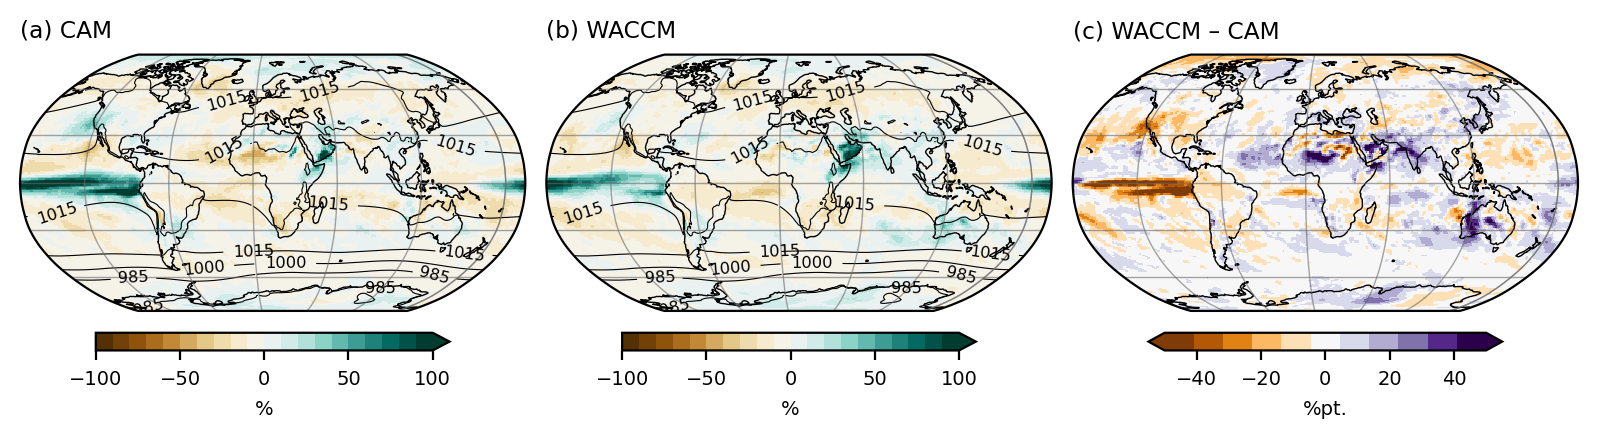

In [49]:
fig = plt.figure(figsize=imgsize1, layout='tight', dpi=imgres)

ax1 = fig.add_subplot(1,3,1,projection=ccrs.Robinson(central_longitude=14))

ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.add_feature(cfeature.LAND)

prectC_20ref.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot1 = pslC_i_c.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='k', vmin=895, vmax=1105, levels=15, linewidths=0.4, kwargs=dict(inline=True))
ax1.clabel(plot1, fontsize='small', inline_spacing=1)

ax1.set_title('(a) CAM', loc='left', fontsize='large')


ax2 = fig.add_subplot(1,3,2,projection=ccrs.Robinson(central_longitude=14))

ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.add_feature(cfeature.LAND)

prectW_20ref.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot2 = pslC_i_c.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='k', vmin=895, vmax=1105, levels=15, linewidths=0.4, kwargs=dict(inline=True))
ax2.clabel(plot2, fontsize='small', inline_spacing=1)

ax2.set_title('(b) WACCM', loc='left', fontsize='large') 


ax3 = fig.add_subplot(1,3,3,projection=ccrs.Robinson(central_longitude=14))

ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.add_feature(cfeature.LAND)

prectCW.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('PuOr',11), vmin=-50, vmax=50, cbar_kwargs={'label':'%pt.', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

# plot3 = prectW_i_c.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-30, vmax=30, levels=7, kwargs=dict(inline=True))
# ax3.clabel(plot3, fontsize='xx-small', inline_spacing=1)

ax3.set_title('(c) WACCM – CAM', loc='left', fontsize='large')

if save == True: plt.savefig('paper_imgs/PRECT_ann.png'); plt.close()


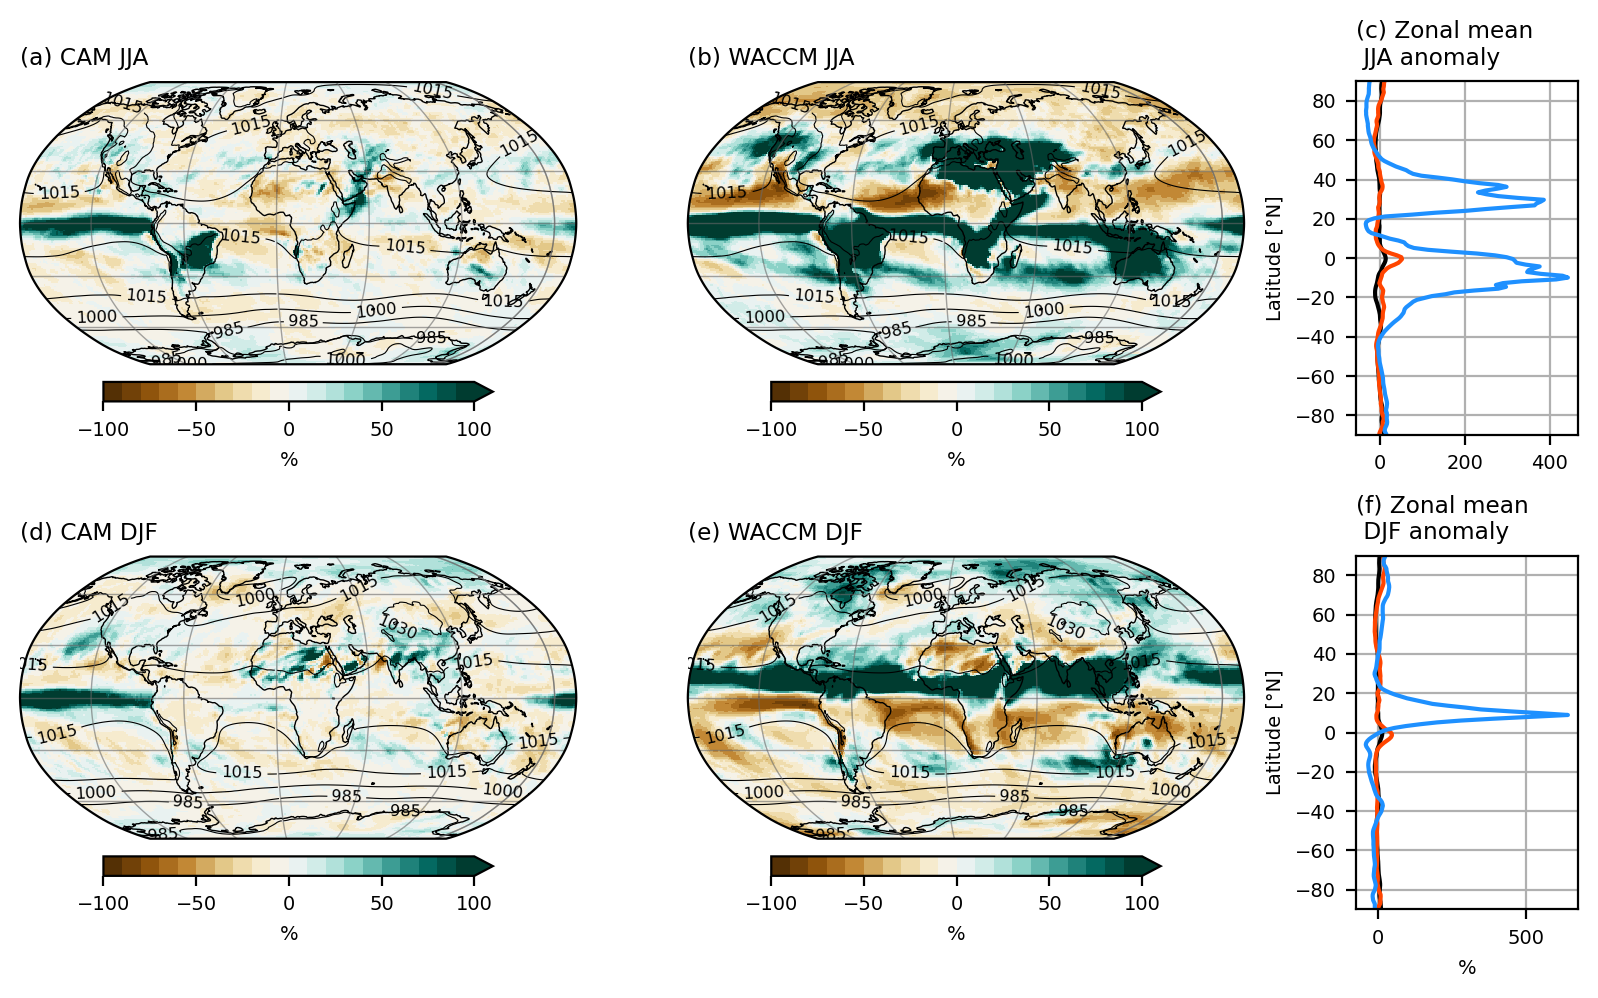

In [50]:
fig = plt.figure(figsize=imgsize3, layout='tight', dpi=imgres)

### CAM JJA
ax1 = fig.add_subplot(2,5,(1,2),projection=ccrs.Robinson(central_longitude=14))

ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.add_feature(cfeature.LAND)

prectCJJA_20ref.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot1 = pslCJJA_i_c.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=895, vmax=1105, levels=15, kwargs=dict(inline=True))
ax1.clabel(plot1, fontsize='small', inline_spacing=1)

ax1.set_title('(a) CAM JJA', loc='left', fontsize='large')

### WACCM JJA
ax2 = fig.add_subplot(2,5,(3,4),projection=ccrs.Robinson(central_longitude=14))

ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.add_feature(cfeature.LAND)

prectWJJA_20ref.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot2 = pslCJJA_i_c.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=895, vmax=1105, levels=15, kwargs=dict(inline=True))
ax2.clabel(plot2, fontsize='small', inline_spacing=1)

ax2.set_title('(b) WACCM JJA', loc='left', fontsize='large')

### JJA zonal mean temp anomaly
ax3 = fig.add_subplot(2,5,5)
# prectC_zma.plot(ax=ax3, y='lat', color='k', linestyle='dashed')
prectW_zma.plot(ax=ax3, y='lat', color='k')
prectCJJA_zma.plot(ax=ax3, y='lat', color='orangered')
prectWJJA_zma.plot(ax=ax3, y='lat', color='dodgerblue')

ax3.set_ylim(-90,90)
ax3.set_xlabel('')
ax3.set_ylabel('Latitude [°N]')
ax3.grid()

ax3.set_title('(c) Zonal mean \n JJA anomaly', loc='left', fontsize='large')


### CAM DJF
ax4 = fig.add_subplot(2,5,(6,7),projection=ccrs.Robinson(central_longitude=14))

ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.add_feature(cfeature.LAND)

prectCDJF_20ref.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot4 = pslCDJF_i_c.plot.contour(ax=ax4, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=895, vmax=1105, levels=15, kwargs=dict(inline=True))
ax4.clabel(plot4, fontsize='small', inline_spacing=1)

ax4.set_title('(d) CAM DJF', loc='left', fontsize='large')

### WACCM DJF
ax5 = fig.add_subplot(2,5,(8,9),projection=ccrs.Robinson(central_longitude=14))

ax5.coastlines(resolution='110m', linewidth=0.5)
ax5.add_feature(cfeature.LAND)

prectWDJF_20ref.plot(ax=ax5, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl5 = ax5.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot5 = pslCDJF_i_c.plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=895, vmax=1105, levels=15, kwargs=dict(inline=True))
ax5.clabel(plot5, fontsize='small', inline_spacing=1)

ax5.set_title('(e) WACCM DJF', loc='left', fontsize='large')

### DJF zonal mean temp anomaly
ax6 = fig.add_subplot(2,5,10)
# prectC_zma.plot(ax=ax6, y='lat', color='k', linestyle='dashed')
prectW_zma.plot(ax=ax6, y='lat', color='k')
prectCDJF_zma.plot(ax=ax6, y='lat', color='orangered')
prectWDJF_zma.plot(ax=ax6, y='lat', color='dodgerblue')

ax6.set_ylim(-90,90)
ax6.set_xlabel('%')
ax6.set_ylabel('Latitude [°N]')
ax6.grid()

ax6.set_title('(f) Zonal mean \n DJF anomaly', loc='left', fontsize='large')

if save == True: plt.savefig('paper_imgs/PRECT_seas.png'); plt.close()



# Zonal wind and potential temperature

## Data

In [51]:
### CAM
scenarios['Control'].get_atm_var2('U')
scenarios['SAI 2020'].get_atm_var2('U')

scenarios['Control']['U']['plev'] = scenarios['Control']['U']['plev']/100
scenarios['SAI 2020']['U']['plev'] = scenarios['SAI 2020']['U']['plev']/100

scenarios['Control'].get_atm_var2('T')
scenarios['SAI 2020'].get_atm_var2('T')

scenarios['Control']['T']['theta'] = theta(scenarios['Control']['T'])
scenarios['SAI 2020']['T']['theta'] = theta(scenarios['SAI 2020']['T'])
scenarios['Control']['T']['plev'] = scenarios['Control']['T']['plev']/100
scenarios['SAI 2020']['T']['plev'] = scenarios['SAI 2020']['T']['plev']/100

In [52]:
### Zonal mean zonal wind annual mean
uC_i_c = time_mean(scenarios['Control']['U'],slice_i)['U'].mean(dim='lon')
# uC_f_c = time_mean(scenarios['Control']['U'],slice_f)['U'].mean(dim='lon')
uC_f_20 = time_mean(scenarios['SAI 2020']['U'],slice_f)['U'].mean(dim='lon')

In [53]:
### Zonal mean potential temperature annual mean
thC_i_c = time_mean(scenarios['Control']['T'],slice_i)['theta'].mean(dim='lon')
# thC_f_c = time_mean(scenarios['Control']['T'],slice_f)['theta'].mean(dim='lon')
thC_f_20 = time_mean(scenarios['SAI 2020']['T'],slice_f)['theta'].mean(dim='lon')

In [54]:
### JJA zonal mean zonal wind
uCJJA_i_c = time_mean(scenarios['Control']['U'].sel(time=scenarios['Control']['U'].time.dt.month.isin([6,7,8])),slice_i)['U'].mean(dim='lon')
# uCJJA_f_c = time_mean(scenarios['Control']['U'].sel(time=scenarios['Control']['U'].time.dt.month.isin([6,7,8])),slice_f)['U'].mean(dim='lon')
uCJJA_f_20 = time_mean(scenarios['SAI 2020']['U'].sel(time=scenarios['SAI 2020']['U'].time.dt.month.isin([6,7,8])),slice_f)['U'].mean(dim='lon')


In [55]:
### JJA Zonal mean potential temperature mean
thCJJA_i_c = time_mean(scenarios['Control']['T'].sel(time=scenarios['Control']['T'].time.dt.month.isin([6,7,8])),slice_i)['theta'].mean(dim='lon')
# thCJJA_f_c = time_mean(scenarios['Control']['T'].sel(time=scenarios['Control']['T'].time.dt.month.isin([6,7,8])),slice_f)['theta'].mean(dim='lon')
thCJJA_f_20 = time_mean(scenarios['SAI 2020']['T'].sel(time=scenarios['SAI 2020']['T'].time.dt.month.isin([6,7,8])),slice_f)['theta'].mean(dim='lon')


In [56]:
### DJF zonal mean zonal wind
uCDJF_i_c = time_mean(scenarios['Control']['U'].sel(time=scenarios['Control']['U'].time.dt.month.isin([1,2,12])),slice_i)['U'].mean(dim='lon')
# uCDJF_f_c = time_mean(scenarios['Control']['U'].sel(time=scenarios['Control']['U'].time.dt.month.isin([1,2,12])),slice_f)['U'].mean(dim='lon')
uCDJF_f_20 = time_mean(scenarios['SAI 2020']['U'].sel(time=scenarios['SAI 2020']['U'].time.dt.month.isin([1,2,12])),slice_f)['U'].mean(dim='lon')


In [57]:
### DJF Zonal mean potential temperature mean 
thCDJF_i_c = time_mean(scenarios['Control']['T'].sel(time=scenarios['Control']['T'].time.dt.month.isin([1,2,12])),slice_i)['theta'].mean(dim='lon')
# thCDJF_f_c = time_mean(scenarios['Control']['T'].sel(time=scenarios['Control']['T'].time.dt.month.isin([1,2,12])),slice_f)['theta'].mean(dim='lon')
thCDJF_f_20 = time_mean(scenarios['SAI 2020']['T'].sel(time=scenarios['SAI 2020']['T'].time.dt.month.isin([1,2,12])),slice_f)['theta'].mean(dim='lon')


In [58]:
### WACCM 
uW_c = CMIP6_get_var('ua')
uW_20 = GLENS2_get_var('U')
uW_c['plev'] = uW_c['plev']/100
uW_20['plev'] = uW_20['plev']/100

thW_c = CMIP6_get_var('ta')
thW_20 = GLENS2_get_var('T')

thW_c['theta'] = theta2(thW_c, 'ta')
thW_20['theta'] = theta2(thW_20, 'T')

thW_c['plev'] = thW_c['plev']/100
thW_20['plev'] = thW_20['plev']/100

In [59]:
### Zonal mean zonal wind annual mean
uW_i_c = time_mean2(uW_c,slice_i,'ua').mean(dim='lon')
# uW_f_c = time_mean2(uW_c,slice_f,'ua').mean(dim='lon')
uW_f_20 = time_mean3(uW_20,slice_f,'U').mean(dim='lon')

In [60]:
### Zonal mean potential temperature annual mean
thW_i_c = time_mean2(thW_c,slice_i,'theta').mean(dim='lon')
# thW_f_c = time_mean2(thW_c,slice_f,'theta').mean(dim='lon')
thW_f_20 = time_mean3(thW_20,slice_f,'theta').mean(dim='lon')

In [61]:
### JJA Zonal mean zonal wind mean
uWJJA_i_c = time_mean2(uW_c.sel(time=uW_c.time.dt.month.isin([6,7,8])),slice_i,'ua').mean(dim='lon')
# uWJJA_f_c = time_mean2(uW_c.sel(time=uW_c.time.dt.month.isin([6,7,8])),slice_f,'ua').mean(dim='lon')
uWJJA_f_20 = time_mean3(uW_20.sel(time=uW_20.time.dt.month.isin([6,7,8])),slice_f,'U').mean(dim='lon')

In [62]:
### JJA Zonal mean potential temperature mean
thWJJA_i_c = time_mean2(thW_c.sel(time=thW_c.time.dt.month.isin([6,7,8])),slice_i,'theta').mean(dim='lon')
# thWJJA_f_c = time_mean2(thW_c.sel(time=thW_c.time.dt.month.isin([6,7,8])),slice_f,'theta').mean(dim='lon')
thWJJA_f_20 = time_mean3(thW_20.sel(time=thW_20.time.dt.month.isin([6,7,8])),slice_f,'theta').mean(dim='lon')

In [63]:
### DJF Zonal mean zonal wind mean
uWDJF_i_c = time_mean2(uW_c.sel(time=uW_c.time.dt.month.isin([1,2,12])),slice_i,'ua').mean(dim='lon')
# uWDJF_f_c = time_mean2(uW_c.sel(time=uW_c.time.dt.month.isin([1,2,12])),slice_f,'ua').mean(dim='lon')
uWDJF_f_20 = time_mean3(uW_20.sel(time=uW_20.time.dt.month.isin([1,2,12])),slice_f,'U').mean(dim='lon')

In [64]:
### DJF Zonal mean potential temperature mean
thWDJF_i_c = time_mean2(thW_c.sel(time=thW_c.time.dt.month.isin([1,2,12])),slice_i,'theta').mean(dim='lon')
# thWDJF_f_c = time_mean2(thW_c.sel(time=thW_c.time.dt.month.isin([1,2,12])),slice_f,'theta').mean(dim='lon')
thWDJF_f_20 = time_mean3(thW_20.sel(time=thW_20.time.dt.month.isin([1,2,12])),slice_f,'theta').mean(dim='lon')

In [65]:
uC_i_c.compute()
uC_20ref = (uC_f_20 - uC_i_c).compute()
uW_i_c.compute()
uW_20ref = (uW_f_20 - uW_i_c).compute()
uCW = (uW_20ref - uC_20ref).compute()

uCJJA_i_c.compute()
uCJJA_20ref = (uCJJA_f_20 - uCJJA_i_c).compute()
uWJJA_i_c.compute()
uWJJA_20ref = (uWJJA_f_20 - uWJJA_i_c).compute()
uCWJJA = (uWJJA_20ref - uCJJA_20ref).compute()

uCDJF_i_c.compute()
uCDJF_20ref = (uCDJF_f_20 - uCDJF_i_c).compute()
uWDJF_i_c.compute()
uWDJF_20ref = (uWDJF_f_20 - uWDJF_i_c).compute()
uCWDJF= (uWDJF_20ref - uCDJF_20ref).compute()


In [66]:
thC_i_c.compute()
thC_20ref = (thC_f_20 - thC_i_c).compute()
thW_i_c.compute()
thW_20ref = (thW_f_20 - thW_i_c).compute()
thCW = (thW_20ref - thC_20ref).compute()

thCJJA_i_c.compute()
thCJJA_20ref = (thCJJA_f_20 - thCJJA_i_c).compute()
thWJJA_i_c.compute()
thWJJA_20ref = (thWJJA_f_20 - thWJJA_i_c).compute()
thCWJJA = (thWJJA_20ref - thCJJA_20ref).compute()

thCDJF_i_c.compute()
thCDJF_20ref = (thCDJF_f_20 - thCDJF_i_c).compute()
thWDJF_i_c.compute()
thWDJF_20ref = (thWDJF_f_20 - thWDJF_i_c).compute()
thCWDJF= (thWDJF_20ref - thCDJF_20ref).compute()


## Plots

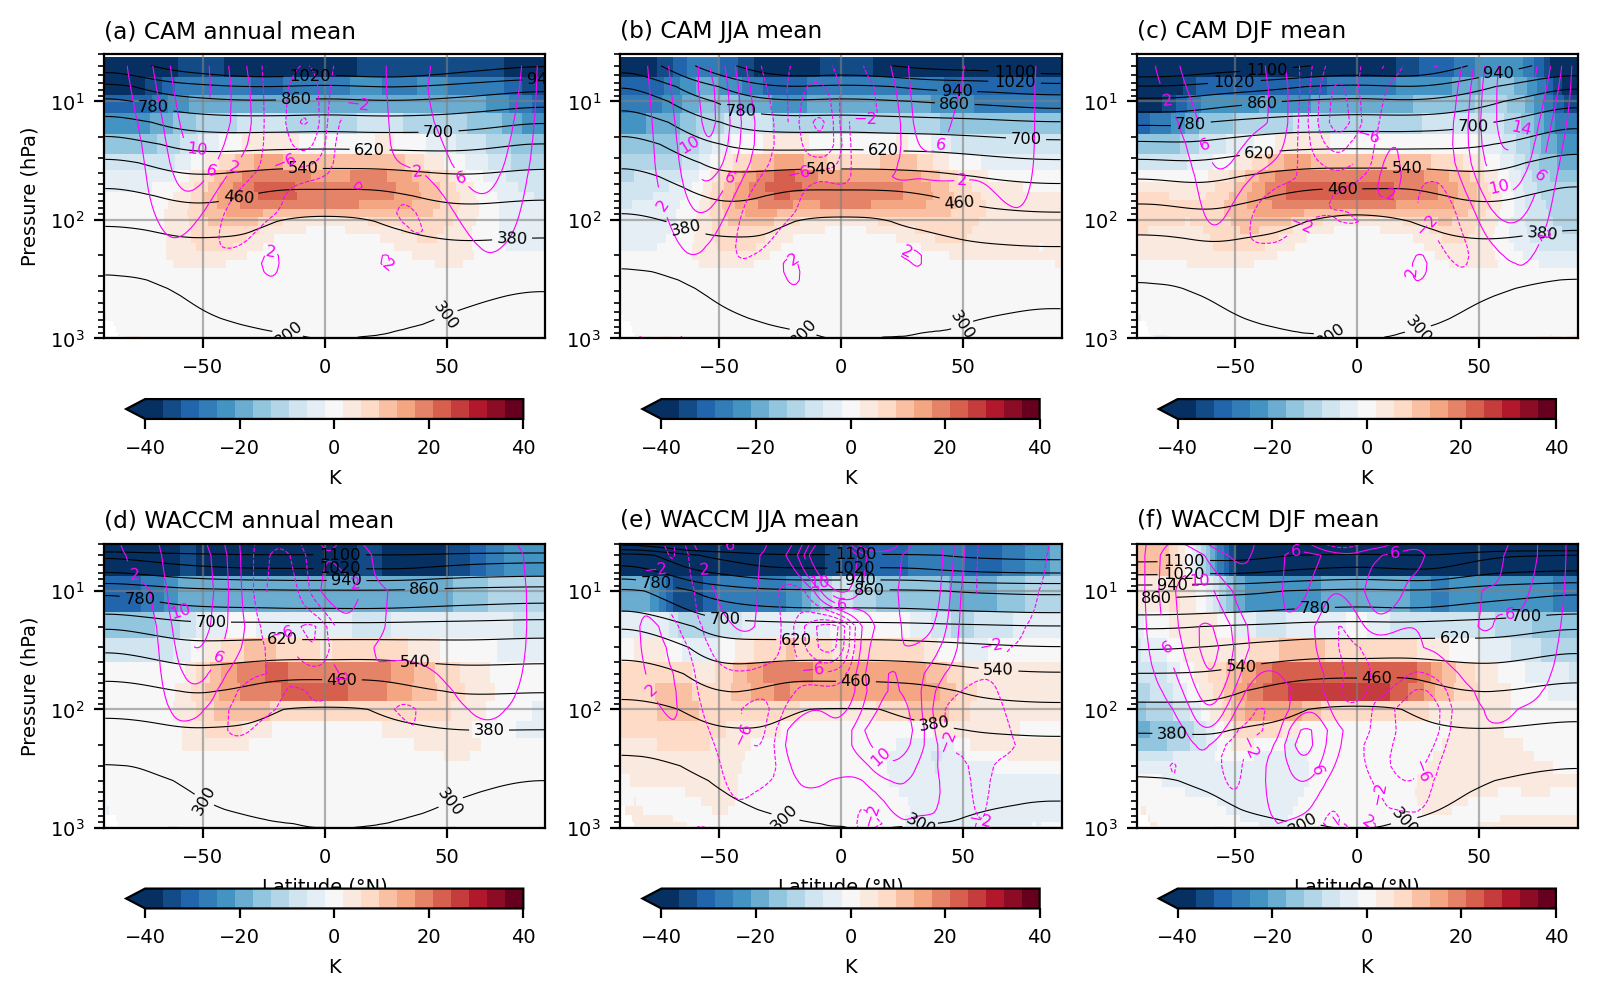

In [67]:
fig = plt.figure(figsize=imgsize3, layout='tight', dpi=imgres)

### CAM annual
ax1 = fig.add_subplot(2,3,1)

thC_20ref.plot(ax=ax1, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot1a = thC_i_c.plot.contour(ax=ax1, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax1.clabel(plot1a, fontsize='small', inline_spacing=1)

# plot1b = uC_i_c.plot.contour(ax=ax1, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax1.clabel(plot1b, fontsize='small', inline_spacing=1)

plot1c = uC_20ref.plot.contour(ax=ax1, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax1.clabel(plot1c, fontsize='small', inline_spacing=1)

ax1.set_xlabel('')
ax1.set_ylabel('Pressure (hPa)')
ax1.invert_yaxis()
ax1.set_yscale('log')
ax1.grid(color='gray', alpha=0.6)
ax1.set_ylim(10**3,4)

ax1.set_title('(a) CAM annual mean', loc='left', fontsize='large')

### CAM JJA
ax2 = fig.add_subplot(2,3,2)

thCJJA_20ref.plot(ax=ax2, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot2a = thCJJA_i_c.plot.contour(ax=ax2, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax2.clabel(plot2a, fontsize='small', inline_spacing=1)

# plot2b = uCJJA_i_c.plot.contour(ax=ax2, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax2.clabel(plot2b, fontsize='small', inline_spacing=1)

plot2c = uCJJA_20ref.plot.contour(ax=ax2, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax2.clabel(plot2c, fontsize='small', inline_spacing=1)

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.invert_yaxis()
ax2.set_yscale('log')
ax2.grid(color='gray', alpha=0.6)
ax2.set_ylim(10**3,4)

ax2.set_title('(b) CAM JJA mean', loc='left', fontsize='large')

### CAM DJF
ax3 = fig.add_subplot(2,3,3)

thCDJF_20ref.plot(ax=ax3, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot3a = thCDJF_i_c.plot.contour(ax=ax3, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax3.clabel(plot3a, fontsize='small', inline_spacing=1)

# plot3b = uCDJF_i_c.plot.contour(ax=ax3, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax3.clabel(plot3b, fontsize='small', inline_spacing=1)

plot3c = uCDJF_20ref.plot.contour(ax=ax3, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax3.clabel(plot3c, fontsize='small', inline_spacing=1)

ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.invert_yaxis()
ax3.grid(color='gray', alpha=0.6)
ax3.set_yscale('log')
ax3.set_ylim(10**3,4)

ax3.set_title('(c) CAM DJF mean', loc='left', fontsize='large')

### WACCM annual
ax4 = fig.add_subplot(2,3,4)

thW_20ref.plot(ax=ax4, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot4a = thW_i_c.plot.contour(ax=ax4, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax4.clabel(plot4a, fontsize='small', inline_spacing=1)

# plot4b = uW_i_c.plot.contour(ax=ax4, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax4.clabel(plot4b, fontsize='small', inline_spacing=1)

plot4c = uW_20ref.plot.contour(ax=ax4, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax4.clabel(plot4c, fontsize='small', inline_spacing=1)

ax4.set_xlabel('Latitude (°N)')
ax4.set_ylabel('Pressure (hPa)')
ax4.invert_yaxis()
ax4.grid(color='gray', alpha=0.6)
ax4.set_yscale('log')
ax4.set_ylim(10**3,4)

ax4.set_title('(d) WACCM annual mean', loc='left', fontsize='large')

### WACCM JJA
ax5 = fig.add_subplot(2,3,5)

thWJJA_20ref.plot(ax=ax5, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot5a = thWJJA_i_c.plot.contour(ax=ax5, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax5.clabel(plot5a, fontsize='small', inline_spacing=1)

# plot5a = uWJJA_i_c.plot.contour(ax=ax5, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax5.clabel(plot5a, fontsize='small', inline_spacing=1)

plot5c = uWJJA_20ref.plot.contour(ax=ax5, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax5.clabel(plot5c, fontsize='small', inline_spacing=1)

ax5.set_xlabel('Latitude (°N)')
ax5.set_ylabel('')
ax5.invert_yaxis()
ax5.grid(color='gray', alpha=0.6)
ax5.set_yscale('log')
ax5.set_ylim(10**3,4)

ax5.set_title('(e) WACCM JJA mean', loc='left', fontsize='large')

### WACCM DJF
ax6 = fig.add_subplot(2,3,6)

thWDJF_20ref.plot(ax=ax6, x='lat', y='plev', cmap=plt.get_cmap('RdBu_r',21), vmin=-40, vmax=40, cbar_kwargs={'label':'K', "location": "bottom", 'shrink':0.9})

plot6a = thWDJF_i_c.plot.contour(ax=ax6, x='lat', y='plev', colors='k', linewidths=0.4, vmin=300, vmax=1100, levels=11, kwargs=dict(inline=True))
ax6.clabel(plot6a, fontsize='small', inline_spacing=1)

# plot6b = uWDJF_i_c.plot.contour(ax=ax6, x='lat', y='plev', colors='limegreen', linewidths=0.4, vmin=-50, vmax=50, levels=13, kwargs=dict(inline=True))
# ax6.clabel(plot6b, fontsize='small', inline_spacing=1)

plot6c = uWDJF_20ref.plot.contour(ax=ax6, x='lat', y='plev', colors='magenta', linewidths=0.4, vmin=-14, vmax=14, levels=8, kwargs=dict(inline=True))
ax6.clabel(plot6c, fontsize='small', inline_spacing=1)

ax6.set_xlabel('Latitude (°N)')
ax6.set_ylabel('')
ax6.invert_yaxis()
ax6.grid(color='gray', alpha=0.6)
ax6.set_yscale('log')
ax6.set_ylim(10**3,4)

ax6.set_title('(f) WACCM DJF mean', loc='left', fontsize='large')

if save == True: plt.savefig('paper_imgs/th_u.png'); plt.close()



# Testing TREFHT

In [68]:
# scenarios['Control']['TREFHT']['TREFHT']
# scenarios['SAI 2020']['TREFHT']['TREFHT']
# scenarios['SAI 2020']['TREFHT']['TREFHT']

# trefhtC_c['tas']
# trefhtW_20['TREFHT']


In [69]:
W_c = trefhtW_c['tas'].sel(time=slice_i)
W_20 = trefhtW_20['TREFHT'].sel(time=slice_f)

In [70]:
test1W_c = W_c.sel(time=W_c.time.dt.month.isin([6,7,8])).mean(dim='time')
test1W_20 = W_20.sel(time=W_20.time.dt.month.isin([6,7,8])).mean(dim='time')

test1 = (test1W_20 - test1W_c).compute()

In [71]:
test2W_c = W_c.sel(time=W_c.time.dt.season=='JJA').mean(dim='time')
test2W_20 = W_20.sel(time=W_20.time.dt.season=='JJA').mean(dim='time')

test2 = (test2W_20 - test2W_c).compute()

In [72]:
test3 = W_c.sel(time=cftime.DatetimeNoLeap(2016, 7, 1, 0, 0, 0, 0, has_year_zero=True))
test4 = W_20.sel(time=cftime.DatetimeNoLeap(2080, 7, 1, 0, 0, 0, 0, has_year_zero=True))


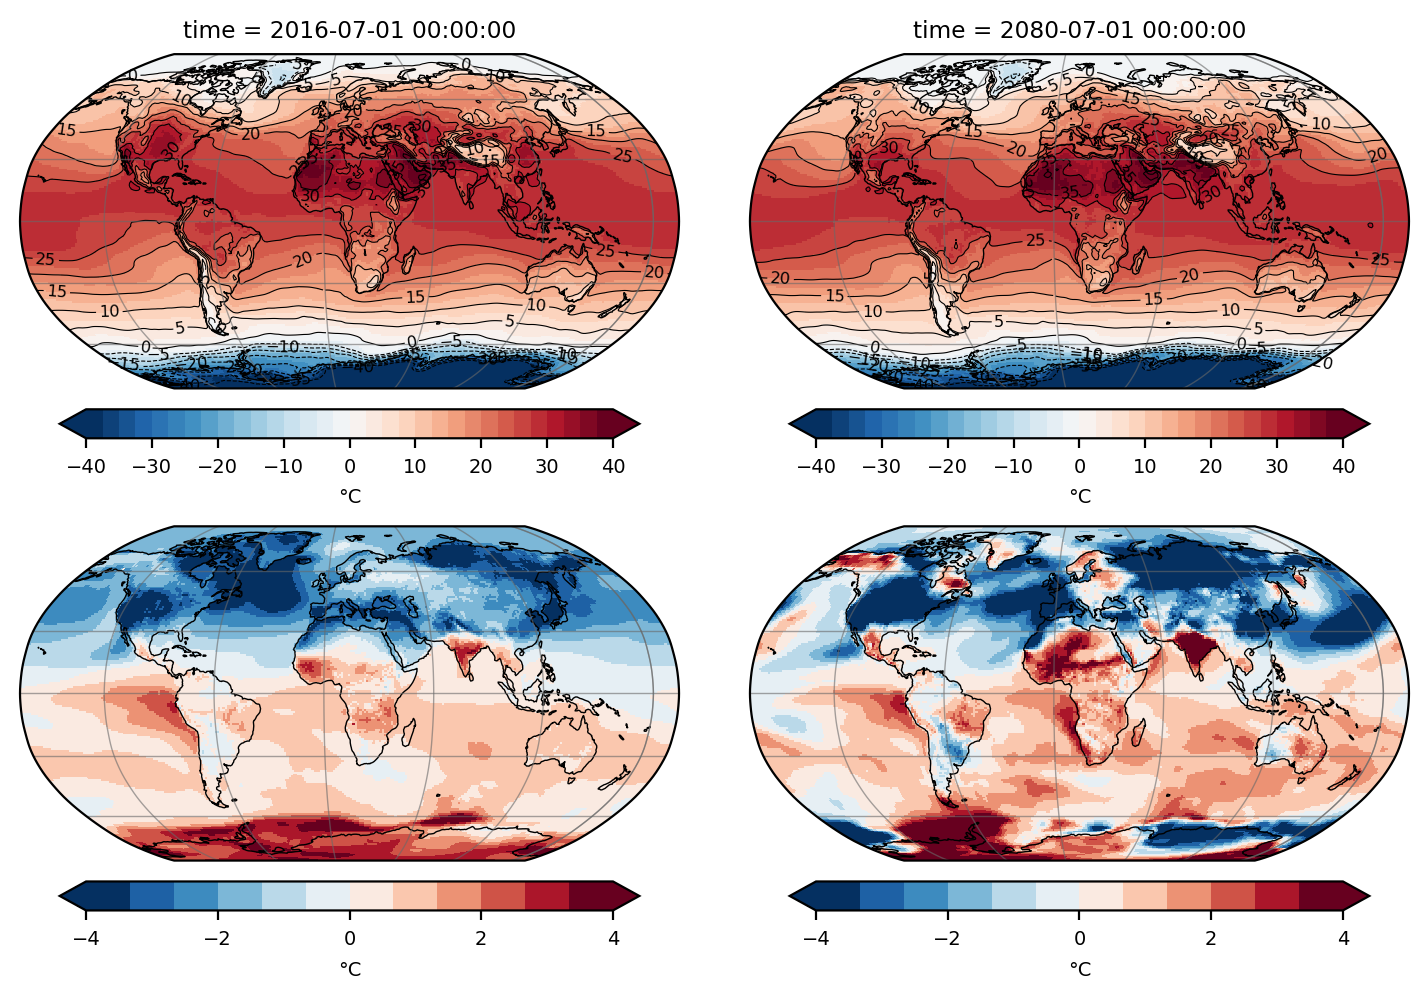

In [73]:
fig = plt.figure(figsize=imgsize3, layout='tight', dpi=imgres)

ax1 = fig.add_subplot(2,2,1,projection=ccrs.Robinson(central_longitude=14))

ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.add_feature(cfeature.LAND)

test3.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 32), vmin=-40, vmax=40, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot1 = test3.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-40, vmax=40, levels=17, kwargs=dict(inline=True))
ax1.clabel(plot1, fontsize='small', inline_spacing=1)


ax2 = fig.add_subplot(2,2,2,projection=ccrs.Robinson(central_longitude=14))

ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.add_feature(cfeature.LAND)

test4.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 32), vmin=-40, vmax=40, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05})
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')

plot2 = test4.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='k', linewidths=0.4, vmin=-40, vmax=40, levels=17, kwargs=dict(inline=True))
ax1.clabel(plot2, fontsize='small', inline_spacing=1)


ax3 = fig.add_subplot(2,2,3,projection=ccrs.Robinson(central_longitude=14))

ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.add_feature(cfeature.LAND)

test1.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')


ax4 = fig.add_subplot(2,2,4,projection=ccrs.Robinson(central_longitude=14))

ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.add_feature(cfeature.LAND)

(test4-test3).plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('RdBu_r', 12), vmin=-4, vmax=4, cbar_kwargs={'label':'°C', "location": "bottom", 'shrink':0.7, 'pad':0.05, 'ticks':[-4,-2,0,2,4]})
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')


# Test PRECT

In [74]:
pW_c = prectW_c['pr'].sel(time=slice_i)
pW_20 = prectW_20['PRECT'].sel(time=slice_f)

In [75]:
xr.set_options(use_bottleneck=False)
test1pW_c = pW_c.sel(time=pW_c.time.dt.month.isin([6,7,8])).mean(dim='time')*2649600
test1pW_20 = pW_20.sel(time=pW_20.time.dt.month.isin([6,7,8])).mean(dim='time')*2649600

test1p = (((test1pW_20 - test1pW_c)/test1pW_c)*100).compute()

In [76]:
test3p = pW_c.sel(time=cftime.DatetimeNoLeap(2016, 7, 1, 0, 0, 0, 0, has_year_zero=True))*2649600
test4p = pW_20.sel(time=cftime.DatetimeNoLeap(2080, 7, 1, 0, 0, 0, 0, has_year_zero=True))*2649600


In [77]:
pW_c = prectW_c['pr'].sel(time=slice_i)
pW_20 = prectW_20['PRECT'].sel(time=slice_f)

test5pW_c = pW_c.sel(time=pW_c.time.dt.month.isin([6,7,8])).mean('time')*2649600
test5pW_20 = pW_20.sel(time=pW_20.time.dt.month.isin([6,7,8])).mean('time')*2649600

test5p = (((test5pW_20 - test1pW_c)/test1pW_c)*100).compute()

In [78]:
test6p1 = pW_c.sel(time=cftime.DatetimeNoLeap(2016, 7, 1, 0, 0, 0, 0, has_year_zero=True))*2649600
test7p1 = pW_20.sel(time=cftime.DatetimeNoLeap(2080, 7, 1, 0, 0, 0, 0, has_year_zero=True))*2649600

test6p2 = pW_c.sel(time=cftime.DatetimeNoLeap(2016, 8, 1, 0, 0, 0, 0, has_year_zero=True))*2649600
test7p2 = pW_20.sel(time=cftime.DatetimeNoLeap(2080, 8, 1, 0, 0, 0, 0, has_year_zero=True))*2649600

test6pa = xr.concat((test6p1,test6p2), dim='time').mean(dim='time')
test7pa = xr.concat((test7p1,test7p2), dim='time').mean(dim='time')

test6pb = (test6p1 + test6p2)/2
test7pb = (test7p1 + test7p2)/2

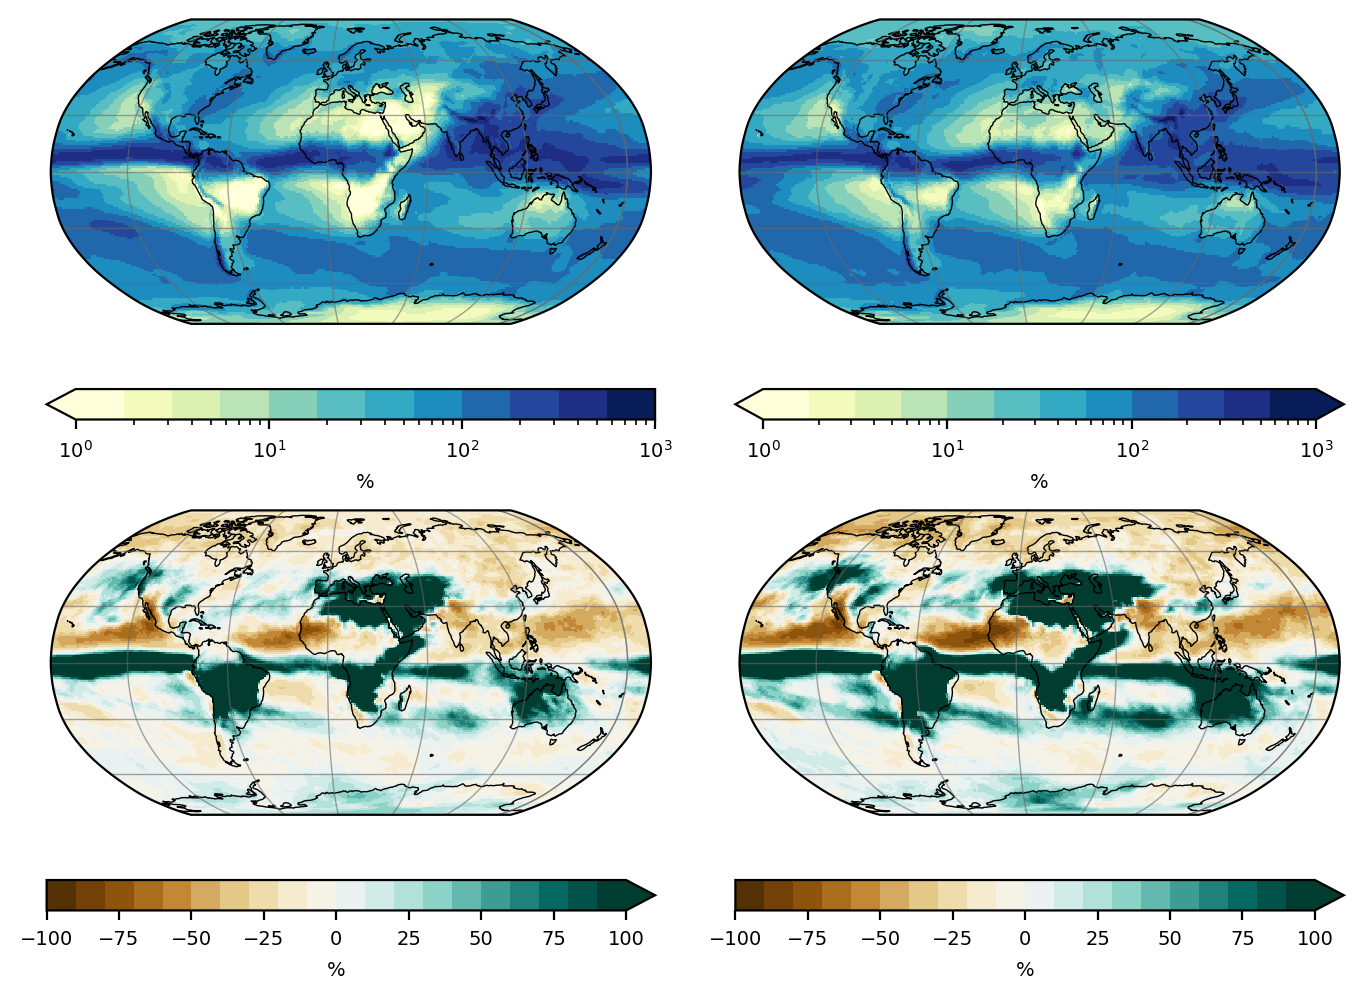

In [79]:
fig = plt.figure(figsize=imgsize3, layout='tight', dpi=imgres)

ax1 = fig.add_subplot(2,2,1,projection=ccrs.Robinson(central_longitude=14))

ax1.coastlines(resolution='110m', linewidth=0.5)
ax1.add_feature(cfeature.LAND)

test1pW_c.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('YlGnBu',12), norm=colors.LogNorm(), vmin= 1, vmax=1000, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7})
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')


ax2 = fig.add_subplot(2,2,2,projection=ccrs.Robinson(central_longitude=14))

ax2.coastlines(resolution='110m', linewidth=0.5)
ax2.add_feature(cfeature.LAND)

test1pW_20.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('YlGnBu',12), norm=colors.LogNorm(), vmin= 1, vmax=1000, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7})
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')


ax3 = fig.add_subplot(2,2,3,projection=ccrs.Robinson(central_longitude=14))

ax3.coastlines(resolution='110m', linewidth=0.5)
ax3.add_feature(cfeature.LAND)

test1p.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7})
gl3 = ax3.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')


ax4 = fig.add_subplot(2,2,4,projection=ccrs.Robinson(central_longitude=14))

ax4.coastlines(resolution='110m', linewidth=0.5)
ax4.add_feature(cfeature.LAND)

prectWJJA_20ref.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=plt.get_cmap('BrBG',20), vmin=-100, vmax=100, cbar_kwargs={'label':'%', "location": "bottom", 'shrink':0.7})
gl4 = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=0.5, color='dimgray', alpha=0.6, linestyle='-')



# Timeseries

In [80]:
serieW_c = trefhtW_c['tas'].sel(lat=42., method='nearest').sel(lon=14., method='nearest').sel(time=slice('2080','2090'))
serieW_20 = trefhtW_20['TREFHT'].sel(lat=42., method='nearest').sel(lon=14., method='nearest').sel(time=slice('2080','2090'))


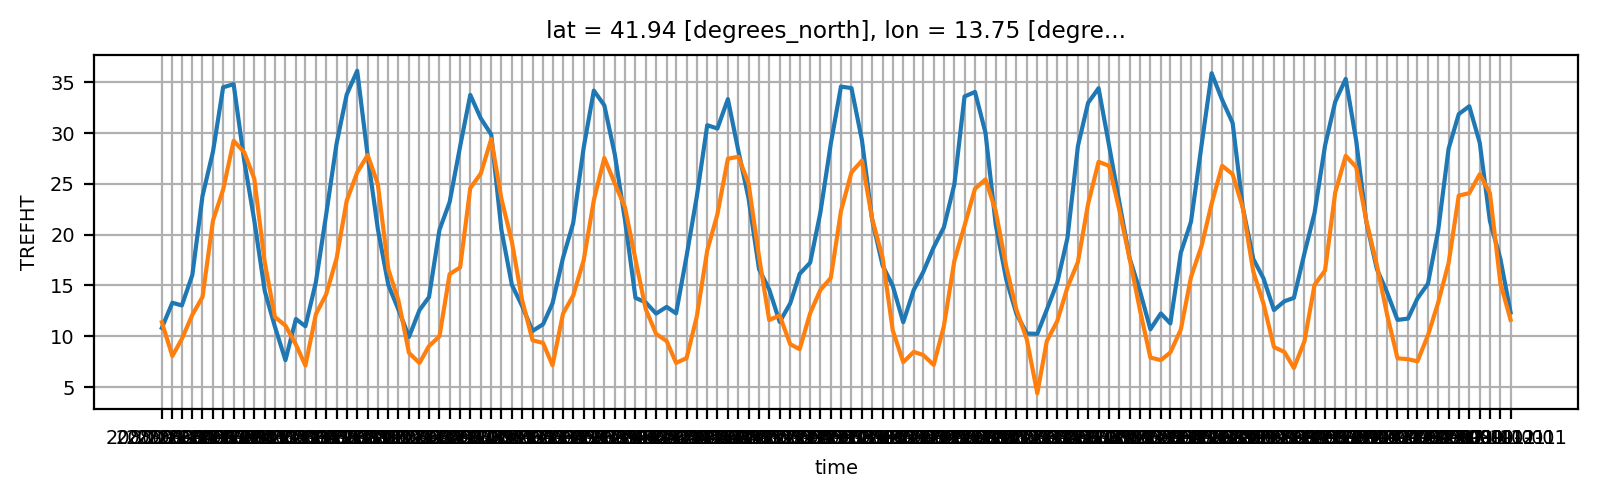

In [81]:
fig, ax1 = plt.subplots(1,1, sharex=True, figsize=imgsize1, layout='tight', dpi=imgres)

# ax1 = fig.add_subplot(2,1,1)

serieW_c.plot(ax=ax1)
serieW_20.plot(ax=ax1)

ax1.grid(which='both')
ax1.set_xticks(serieW_c.time.values)

plt.savefig('paper_imgs/test_serie.png')